# Read from HDF and viz 

In [1]:
import os
import glob
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('../')

In [2]:
from utils import calc_features_ramp, calc_features_step, find_spikes
from dap.utils import obs_params, load_current

In [3]:
data_dir = '/home/alteska/Desktop/LFI_DAP/data/rawData/2015_08_26b.dat'

In [4]:
# calculate DAP
# load the input data
Ir, vr, tr, t_onr, t_offr, dtr = load_current(data_dir, protocol='rampIV', ramp_amp=3.1)
Is, vs, ts, t_ons, t_offs, dts = load_current(data_dir, protocol='IV', ramp_amp=1)

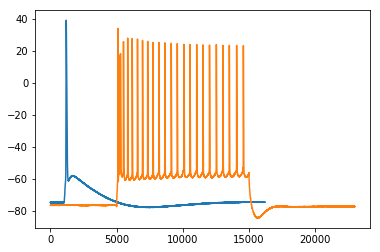

In [5]:
plt.plot(vr)
plt.plot(vs);

In [6]:
feat_ramp_data = calc_features_ramp(vr, tr, dtr, t_onr, t_offr)
feat_ramp_data

array([-74.9345 , 113.997  ,   0.73   , -59.96875,  14.21575,  19.73   ,
        -0.75   ,   1.39   , -78.09375])

In [7]:
feat_step_data = calc_features_step(vs, ts, dts, t_ons, t_offs)
feat_step_data

array([-76.63358125, 0.06351057982730121, 48.0, 20.62173913043478,
       6.066798921122928, 24,
       array([254.6 , 258.4 , 264.6 , 275.95, 291.85, 309.  , 328.9 , 347.95,
       367.45, 387.1 , 409.75, 432.15, 456.4 , 479.25, 504.55, 527.35,
       552.55, 575.95, 600.95, 626.85, 651.45, 675.85, 703.5 , 728.9 ])],
      dtype=object)

In [8]:
# load the file
fname = 'dap_models_5_param_1x30.hdf'
# fname = 'dap_models_4_param_1x20.hdf'

df_steps = pd.read_hdf(fname, key='step_features')
df_ramps = pd.read_hdf(fname, key='ramp_features')
df_traces = pd.read_hdf(fname, key='param_traces')

In [9]:
df_traces.index.rename('id', inplace=True)
df_traces.reset_index(level=0, inplace=True)
df_traces.head()

,id,gbar_nap,gbar_leak,gbar_nat,gbar_kdr,gbar_hcn,distance_ramp,distance_step,distance_sum,step_traces,ramp_traces
0,1x6,17.608778,0.999338,79.678240,3.391087,0.051448,888.588117,1970.032738,2858.620855,"[-75.00741605766737, -74.95003969548506, -74.8...","[-75.00783735160118, -74.97437745626856, -74.9..."
1,1x10,15.614517,1.044416,140.417826,3.539281,0.051953,511.563751,2276.209894,2787.773645,"[-74.99419940946575, -75.02823848696148, -75.0...","[-75.01328699897375, -75.028336396094, -75.019..."
2,1x9,17.315070,1.057800,118.918062,3.516548,0.054235,766.810847,2532.620661,3299.431508,"[-75.00002849987123, -74.9800216764795, -74.92...","[-75.01243044755087, -74.97448873625879, -74.9..."
3,1x2,14.175050,1.782692,26.169923,2.169628,0.053212,1202.443532,1871.673447,3074.116979,"[-74.99022425090345, -74.94802028207006, -74.9...","[-74.9879554906601, -74.98881472558149, -74.98..."
4,1x26,17.030042,1.016935,120.070622,3.466972,0.051819,649.356308,2485.605262,3134.961570,"[-74.98764622358885, -74.9725152041406, -74.94...","[-74.99898250803659, -75.0046177908949, -75.01..."


In [10]:
# df_traces2 = df_traces[df_traces.distance_step < 2500]
# df_traces2

In [11]:
# df_traces3 = df_traces[df_traces.distance_ramp < 2000]
# df_traces3

/home/alteska/anaconda3/envs/dap2/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


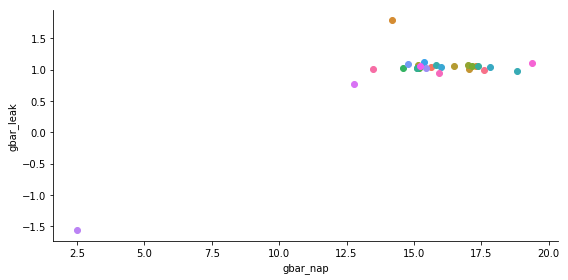

In [12]:
g = sns.FacetGrid( data=df_traces, size=4, aspect=2, hue='id');
g.map(plt.scatter, "gbar_nap", "gbar_leak");

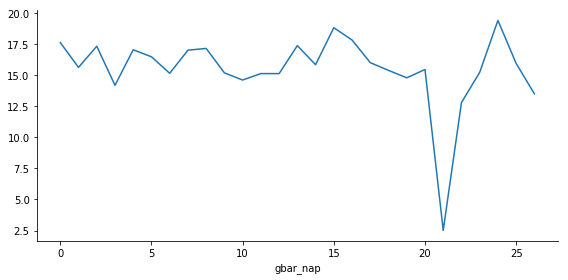

In [13]:
g = sns.FacetGrid( data=df_traces, height=4, aspect=2);
g.map(plt.plot, "gbar_nap");

AttributeError: Unknown property width

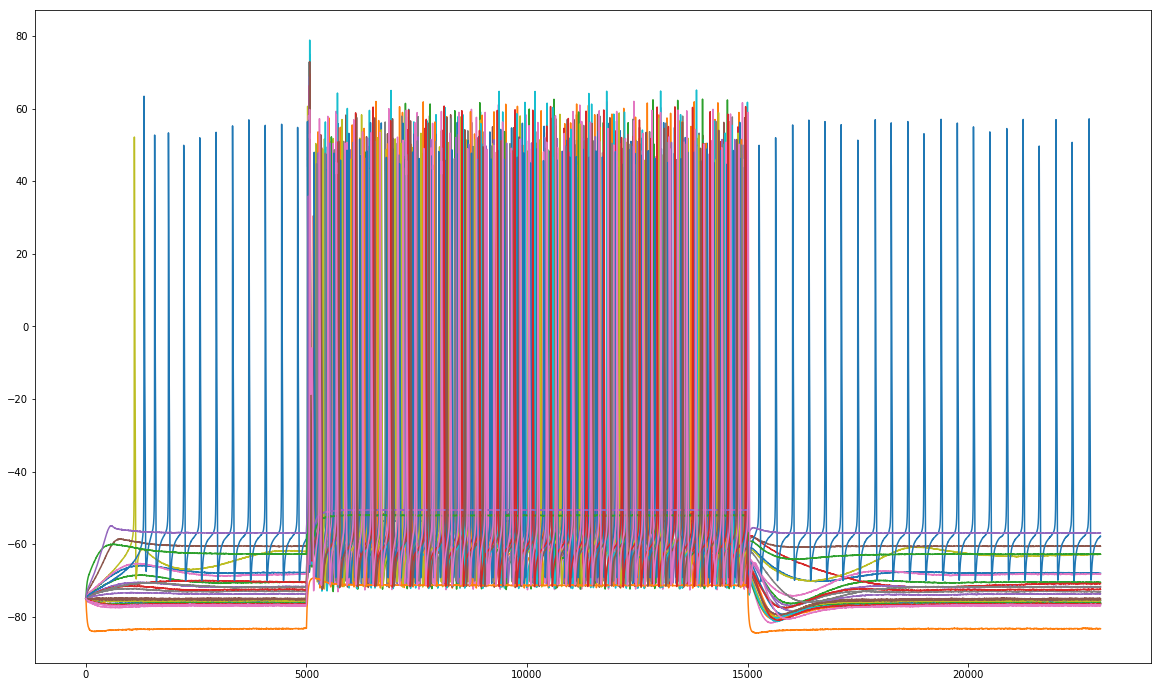

In [14]:
plt.figure(figsize=(20, 12))

for i, tr in df_traces.iterrows():
    plt.plot(tr.step_traces, label=i);
    
plt.plot(vr, width=2)
plt.legend();

In [ ]:
plt.figure(figsize=(20, 12))

for i, tr in df_traces3.iterrows():
    plt.plot(tr.ramp_traces, label=i);
    
plt.legend();

In [ ]:
sns.distplot(df_traces.gbar_nap);

In [ ]:
sns.distplot(df_traces.gbar_leak);

In [ ]:
plt.plot(df_traces.ramp_traces[0]);

In [ ]:
# g = sns.FacetGrid(hue='id', data=df_traces, size=4, aspect=2)
# g.map(plt.plot, 'step_traces')